In [26]:
import librosa
import numpy as np

In [23]:
y, sr = librosa.load('data/lofi.wav')

In [25]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, units='time')

NameError: name 'times' is not defined

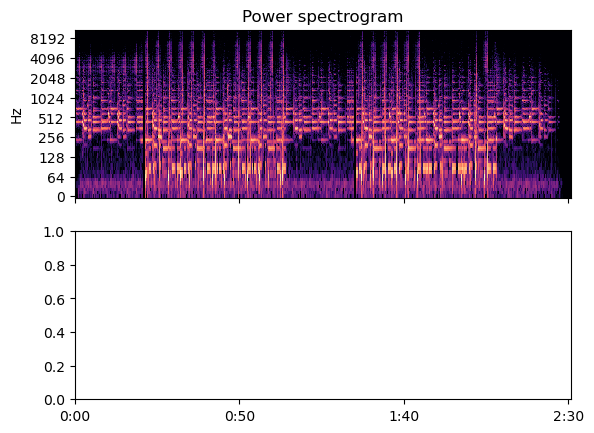

In [27]:
import matplotlib.pyplot as plt

y, sr = librosa.load('data/lofi.wav')
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()